In [39]:
# import required libraries
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [40]:
# read the data of the stock
df = pd.read_csv('C:\\Users\\hp\\Downloads\\Nifty50_Stock_Market_dataset\\TCS.csv')
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-08-25,TCS,EQ,850.00,1198.70,1198.70,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,NaN,5206360,0.3042
1,2004-08-26,TCS,EQ,987.95,992.00,997.00,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561
2,2004-08-27,TCS,EQ,979.00,982.40,982.40,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549
3,2004-08-30,TCS,EQ,962.65,969.90,990.00,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294
4,2004-08-31,TCS,EQ,986.75,986.50,990.00,976.00,987.80,988.10,982.18,2649332,2.602133e+14,NaN,695234,0.2624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4134,2021-04-26,TCS,EQ,3109.50,3102.05,3153.00,3088.05,3100.05,3100.80,3122.35,2490260,7.775465e+14,87012.0,1345353,0.5402
4135,2021-04-27,TCS,EQ,3100.80,3106.00,3136.10,3103.00,3132.75,3132.00,3122.18,1471417,4.594036e+14,97077.0,849767,0.5775
4136,2021-04-28,TCS,EQ,3132.00,3149.95,3151.00,3112.00,3123.00,3124.10,3125.72,1639037,5.123176e+14,76017.0,847762,0.5172
4137,2021-04-29,TCS,EQ,3124.10,3145.60,3157.35,3105.50,3114.45,3115.25,3130.83,1621395,5.076306e+14,98275.0,837567,0.5166


In [41]:
df1=df[["Date","VWAP"]]

In [42]:
df1.head()

,Date,VWAP
0,2004-08-25,1008.32
1,2004-08-26,985.65
2,2004-08-27,969.94
3,2004-08-30,982.65
4,2004-08-31,982.18


In [43]:
df1.describe()

,VWAP
count,4139.000000
mean,1694.618120
std,723.144157
min,368.400000
25%,1105.750000
50%,1629.420000
75%,2319.895000
max,3633.110000


In [44]:
df1.set_index('Date',inplace=True)
price_data=df1
df1

,VWAP
Date,
2004-08-25,1008.32
2004-08-26,985.65
2004-08-27,969.94
2004-08-30,982.65
2004-08-31,982.18
...,...
2021-04-26,3122.35
2021-04-27,3122.18
2021-04-28,3125.72


<AxesSubplot:xlabel='Date'>

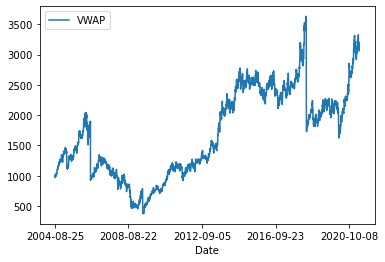

In [46]:
df1.plot()

For ARIMA first thing we do is identify if the data is stationary or non – stationary. if data is non-stationary we will try to make them stationary then we will process further.
### Adfuller test (Augmented Dickey-Fuller Test)

In [47]:
from statsmodels.tsa.stattools import adfuller

In [48]:
result=adfuller(df1['VWAP'])
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
for value,label in zip(result,labels):
    print(label+' : '+str(value) )

ADF Test Statistic : -1.5583531365590606
p-value : 0.5044730957330678
#Lags Used : 4
Number of Observations : 4134


Here P-value is 0.5 which is greater than 0.05, which means data is accepting the null hypothesis, which means data is non-stationary.

In [49]:
df1['diff'] = df1.diff().dropna()

In [50]:
df1 = df1.dropna()

In [51]:
result1=adfuller(df1['diff'])
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
for value,label in zip(result1,labels):
    print(label+' : '+str(value) )

ADF Test Statistic : -32.46166101905158
p-value : 0.0
#Lags Used : 3
Number of Observations : 4134


Now p-value is less than 0.05 so the data is stationary

In [52]:
sm.stats.durbin_watson(df1['VWAP']) # have less correlation

0.0005101663759529115

In [56]:
train = price_data['VWAP'][:3310]
test = price_data['VWAP'][3310:]
print(train.shape)
print(test.shape)

(3310,)
(829,)


### Using Auto ARIMA To get p, d, q values

In [58]:
#!pip install --user pmdarima

In [59]:
import pmdarima as pmd

def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                              start_p=1, 
                              start_q=1,
                              test="adf",
                              trace=True)
    return autoarima_model

In [60]:
model = arimamodel(train)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=31882.759, Time=2.86 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=31907.213, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=31882.527, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=31881.250, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=31906.035, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=31882.357, Time=0.57 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=31871.396, Time=1.91 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=31871.595, Time=1.42 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=31873.860, Time=2.08 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=31879.533, Time=0.84 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=31871.171, Time=2.22 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=31881.372, Time=0.21 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=31873.000, Time=1.57 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=31877.085, Time=0.24 sec
 ARIMA(3,1,2)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3310
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -15930.224
Date:                Sun, 18 Sep 2022   AIC                          31870.449
Time:                        21:10:09   BIC                          31900.971
Sample:                             0   HQIC                         31881.373
                               - 3310                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9136      0.159      5.740      0.000       0.602       1.226
ar.L2         -0.4603      0.131     -3.521      0.000      -0.716      -0.204
ma.L1         -0.8254      0.162     -5.110      0.000      -1.142      -0.509
ma.L2          0.3648      0.136      2.688      0.007       0.099       0.631
sigma2       889.5199      2.867    310.312      0.000     883.902     895.138
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          16354483.73
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.66   Skew:                           -11.20
Prob(H) (two-sided):                  0.00   Kurtosis:                       346.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Use the p,d,q values in the ARIMA model to predict price for test data

In [73]:
from statsmodels.tsa.arima.model import ARIMA

In [74]:
arima= ARIMA(train,order=(2,1,2))

In [75]:
model1=arima.fit()

In [76]:
model1.aic

31870.448612856526

In [96]:
pred = model1.forecast(steps=829)

In [97]:
pred

3310    2573.089562
3311    2571.390020
3312    2570.072246
3313    2569.650572
3314    2569.871864
           ...     
4134    2570.410411
4135    2570.410411
4136    2570.410411
4137    2570.410411
4138    2570.410411
Name: predicted_mean, Length: 829, dtype: float64